# TP 10 - Parcours et arbres couvrants

Commencez par créer un graphe **connexe** aléatoire `G`, de type $G_{n,m}$, avec 10 sommets et 15 arêtes

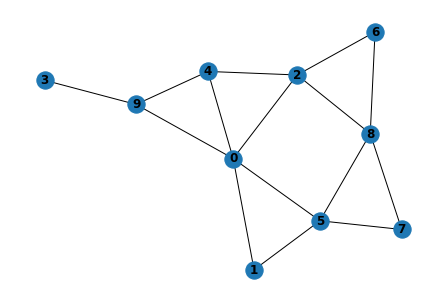

In [5]:
import networkx as nx
import numpy as np

G = nx.gnm_random_graph(10, 15, seed=2)
while not nx.is_connected(G):
    G = nx.gnm_random_graph(10, 15, seed=2)


def display_G():
    nx.draw(G, with_labels=True, font_weight='bold')  

display_G()

## Exercice 1 : Parcours en largeur (BFS)
Ecrivez une fonction `BFSTraversal` qui prend en paramètre un graphe `G` et un sommet de départ `s`, et qui renvoie, sous forme d'une liste, l'ordre de parcours en largeur des sommets du graphe `G` (les voisins sont pris dans l'ordre croissant de leur numéro).

In [2]:
def BFSTraversal(G, s):
    visited = [False] * G.number_of_nodes()
    queue = []
    queue.append(s)
    visited[s] = True
    res = []
    while queue:
        s = queue.pop(0)
        res.append(s)
        print(s, res, G[s])
        for i in G[s]:
            if visited[i] == False:
                queue.append(i)
                visited[i] = True
    return res

BFSTraversal(G, 3)


3 [3] {9: {}}
9 [3, 9] {4: {}, 3: {}, 0: {}}
4 [3, 9, 4] {2: {}, 9: {}, 0: {}}
0 [3, 9, 4, 0] {1: {}, 9: {}, 4: {}, 5: {}, 2: {}}
2 [3, 9, 4, 0, 2] {4: {}, 6: {}, 8: {}, 0: {}}
1 [3, 9, 4, 0, 2, 1] {0: {}, 5: {}}
5 [3, 9, 4, 0, 2, 1, 5] {1: {}, 8: {}, 0: {}, 7: {}}
6 [3, 9, 4, 0, 2, 1, 5, 6] {2: {}, 8: {}}
8 [3, 9, 4, 0, 2, 1, 5, 6, 8] {6: {}, 5: {}, 7: {}, 2: {}}
7 [3, 9, 4, 0, 2, 1, 5, 6, 8, 7] {8: {}, 5: {}}


[3, 9, 4, 0, 2, 1, 5, 6, 8, 7]

Testez votre fonction sur le graphe `G` créé au début du TP

## Exercice 2 : Parcours en profondeur (DFS)
Adaptez la fonction `BFSTraversal` pour obtenir la fonction `DFSTraversal`, qui prend en paramètre un graphe `G` et un sommet de départ `s`, et qui renvoie, sous forme d'une liste, l'ordre de parcours en profondeur des sommets du graphe `G` (les voisins sont pris dans l'ordre croissant de leur numéro).

### Version 1 : itérative

In [6]:
def DFSTraversal(G, s):
    visited = [False] * G.number_of_nodes()
    stack = []
    stack.append(s)
    visited[s] = True
    res = []
    while stack:
        s = stack.pop()
        res.append(s)
        print(s, res, G[s], stack)
        for i in G[s]:
            if visited[i] == False:
                stack.append(i)
                visited[i] = True
    return res

Testez votre fonction sur le graphe `G` créé au début du TP

In [8]:
DFSTraversal(G, 3)

# for n in G.neighbors(1):
#     print(n)

3 [3] {9: {}} []
9 [3, 9] {4: {}, 3: {}, 0: {}} []
0 [3, 9, 0] {1: {}, 9: {}, 4: {}, 5: {}, 2: {}} [4]
2 [3, 9, 0, 2] {4: {}, 6: {}, 8: {}, 0: {}} [4, 1, 5]
8 [3, 9, 0, 2, 8] {6: {}, 5: {}, 7: {}, 2: {}} [4, 1, 5, 6]
7 [3, 9, 0, 2, 8, 7] {8: {}, 5: {}} [4, 1, 5, 6]
6 [3, 9, 0, 2, 8, 7, 6] {2: {}, 8: {}} [4, 1, 5]
5 [3, 9, 0, 2, 8, 7, 6, 5] {1: {}, 8: {}, 0: {}, 7: {}} [4, 1]
1 [3, 9, 0, 2, 8, 7, 6, 5, 1] {0: {}, 5: {}} [4]
4 [3, 9, 0, 2, 8, 7, 6, 5, 1, 4] {2: {}, 9: {}, 0: {}} []


[3, 9, 0, 2, 8, 7, 6, 5, 1, 4]

### Version 2 : récursive
Modifiez la fonction précédente pour transformer `DFSTraversal` en une fonction **récursive** `DFSTraversalRec`. Quels paramètres doivent être ajoutés ?

In [54]:
# On doit ajouter visited pour savoir quel node nous avons déjà visiter et le résultat final

def DFSTraversalRec(G, s, visited):
    if s not in visited:
        visited.append(s)
        for n in list(G.neighbors(s)):
            DFSTraversalRec(G, n, visited)
        return visited

Testez votre fonction sur le graphe `G` créé au début du TP

In [55]:
DFSTraversalRec(G, 3, [])

[3, 9, 4, 2, 6, 8, 5, 1, 0, 7]

## Exercice 3 : Connexité
**Question 1** : Donnez un moyen simple de générer un graphe **non connexe**, et mettez-la en oeuvre avec Networkx pour créer un graphe `H`.

**Réponse** :

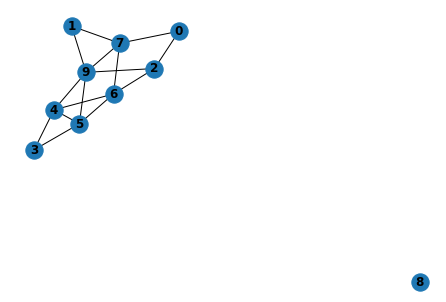

In [56]:
H = nx.gnm_random_graph(10, 15)
while nx.is_connected(H) == True:
    H = nx.gnm_random_graph(10, 15)
nx.draw(H, with_labels=True, font_weight='bold')  

**Question 2** : Appliquez la fonction `DFSTraversal` au graphe `H`. Que constatez-vous ?

In [57]:
"""Le résultat retourner ne contient qu'un seul des graphs, comme il est connexe la méthode ne passe pas dans l'autre graph"""
print(DFSTraversal(H, 4))

print(DFSTraversal(H, 3))

[4, 9, 7, 0, 1, 2, 6, 5, 3]
[3, 5, 9, 7, 0, 1, 2, 6, 4]


**Réponse** :

**Question 3** : Utilisez la fonction `DFSTraversal` pour écrire une fonction `isConnected(G)` qui renvoie `True` si `G` est connexe, et `False` sinon. Testez-la sur les graphes `G` et `H`.

In [58]:
def isConnected(G):
    for n in G.nodes():
        size = DFSTraversal(G, n)
        if len(size) != G.number_of_nodes(): return False
    return True

# Pour le graph G return True
print(isConnected(G))

# Pour le graph H return False
print(isConnected(H))

True
False


**Question 4** : Utilisez la fonction `DFSTraversal` pour écrire une fonction `connectedComponents` qui renvoie la liste de *toutes* les composantes connexes d'un graphe. *Réfléchissez bien à la complexité algorithmique de la solution mise en oeuvre*.

In [59]:
def connectedComponents(G):
    res = []
    min = [False] * G.number_of_nodes()
    for n in G.nodes():
        size = DFSTraversal(G, n)
        if min[len(size)] == False: 
            min[len(size)] = True
            res.append(size)
    return res

connectedComponents(H)

[[0, 2, 6, 5, 3, 4, 9, 1, 7], [8]]

**Réponse** :

**Question 5** : Utilisez la fonction `connectedComponents` pour écrire une deuxième version de la fonction `isConnected(G)`. Laquelle des deux fonctions est à privilégier et pourquoi ?

In [60]:
def isConnected_v2(G):
    res = connectedComponents(G)
    for row in res:
        if len(row) != G.number_of_nodes(): return False
    return True
    
isConnected_v2(H)

False

**Réponse** :

## Question 4 : Algorithme de Kruskal
**Question 1** : Utilisez les fonctions existantes de NetworkX pour transformer `G` en un graphe **pondéré**, où chaque arête a un poids aléatoire compris entre `0` et `10`.

In [61]:
import random as rd

for a,b,c in G.edges(data=True):
    G[a][b]['weight'] = rd.randint(0,10)

**Question 2** : Implémentez l'algorithme de Kruskal dans une fonction `Kruskal(G)`. Cette fonction doit renvoyer la *liste des arêtes* constituant un arbre couvrant de poids minimum.

💡 Utilisez la fonction `is_forest` de Networkx pour détecter les cycles. 

In [62]:
def Kruskal(G):
    edges_sorted = sorted(G.edges(data=True), key=lambda node: node[2].get('weight', 1))
    final = []
    graph = nx.Graph()
    graph.add_edge(edges_sorted[0][0], edges_sorted[0][1])
    for node in edges_sorted:
        graph.add_edge(node[0], node[1])
        if not nx.is_forest(graph):
            graph.remove_edge(node[0], node[1])
        else:
            final.append(node)
    return final    
Kruskal(G)

[(0, 2, {'weight': 0}),
 (1, 5, {'weight': 0}),
 (2, 4, {'weight': 1}),
 (5, 8, {'weight': 3}),
 (0, 1, {'weight': 4}),
 (0, 9, {'weight': 4}),
 (7, 8, {'weight': 5}),
 (2, 6, {'weight': 6}),
 (3, 9, {'weight': 7})]

Testez votre fonction sur le graphe pondéré `G`, en affichant l'arbre couvrant obtenu (vous pouvez affichez seulement l'arbre, ou surligner les arêtes sur le graphe `G`).

{(0, 2): Text(0.4413753081722675, -0.06002159357508334, '0'),
 (0, 1): Text(0.02526859512681253, -0.3193684515008631, '4'),
 (0, 9): Text(0.0025314274106632804, -0.2092073744657193, '4'),
 (2, 4): Text(0.9343087144956043, 0.094374341902258, '1'),
 (2, 6): Text(0.8531289526466883, 0.18613357085388782, '6'),
 (1, 5): Text(-0.46549310346518885, -0.06957395795519104, '0'),
 (5, 8): Text(-0.9270359326282127, 0.18985980500739025, '3'),
 (8, 7): Text(-0.8778840285858611, 0.1039469456127647, '5'),
 (9, 3): Text(-0.016818414272301678, -0.1072984478531117, '7')}

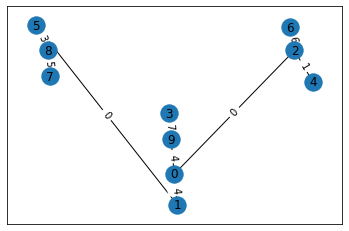

In [74]:
def covering_graph(G):
    nodes = Kruskal(G)
    graph = nx.Graph()
    for node in nodes:
        graph.add_edge(node[0], node[1], weight=node[2]['weight'])
    return graph

A = covering_graph(G)
pos = nx.spring_layout(A)
nx.draw_networkx(A,pos)
labels = nx.get_edge_attributes(A,'weight')
nx.draw_networkx_edge_labels(A,pos,edge_labels=labels)

## Exercice 5 : Algorithme de Prim
**Question 1** : implémentez l'algorithme de Prim, et testez-le sur le graphe pondéré `G`.

{(0, 2): Text(0.32973170193656326, 0.17364808183978303, '0'),
 (0, 1): Text(0.5473311576642337, -0.5660500924905527, '4'),
 (0, 9): Text(0.6431919190133799, -0.4741352800194153, '4'),
 (2, 6): Text(0.11776941822901152, 0.8371864936464612, '6'),
 (2, 4): Text(0.002581889539348556, 0.9309388004593249, '1'),
 (1, 5): Text(-0.24454117884972737, -0.47627329611004987, '0'),
 (3, 9): Text(0.7518193897645713, -0.4178469176959775, '7'),
 (5, 8): Text(-0.9533702875827692, -0.2842977632268677, '3'),
 (7, 8): Text(-0.8828626403616915, -0.18577556122089217, '5')}

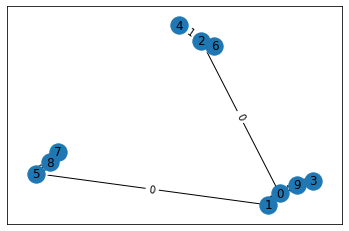

In [68]:
def Prim(G, s):
    MAX = 9999999
    visiter = [False] * G.number_of_nodes()
    parents = [None] * G.number_of_nodes()
    weights = [MAX] * G.number_of_nodes()
    weights[s] = 0
    sommet = s
    visiter[s] = True
    
    while False in visiter :
        neighbors = G.neighbors(sommet)

        for n in neighbors:
            weight_edge = G[sommet][n]["weight"]
            if weight_edge < weights[n] and not visiter[n]:
                weights[n] = weight_edge
                parents[n] = sommet
        
        w_min = MAX
        for i in list(G.nodes):
            if not visiter[i]:            
                if weights[i] <= w_min:
                    sommet = i
                    w_min = weights[i]
        visiter[sommet] = True

    F = nx.Graph();
    for n in list(G.nodes):
      if parents[n] != None:
        F.add_edge(n,parents[n])
        F[n][parents[n]]['weight'] = weights[n]
    return F

A = Prim(G, 6)

pos = nx.spring_layout(A)
nx.draw_networkx(A,pos)
labels = nx.get_edge_attributes(A,'weight')
nx.draw_networkx_edge_labels(A,pos,edge_labels=labels)

## Exercice 6: détection de cycle dans un graphe
**Question 1** : Comment peut-on détecter les cycles dans un graphe à l'aide d'un parcours en profondeur ? Ecrivez la fonction `hasCycle(G)`.

Testez la fonction `hasCycle` sur le graphe `G` et sur un arbre aléatoire `T`:

**Question 2** : Ecrivez une fonction `isTree(G)` qui renvoie `True` si et seulement si `G` est un arbre.